In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset = pd.read_csv('sensirion_fluke.csv')
dataset.head(11)

,percent,average-flow(L/min)-Fluke,std_dev-Fluke,average-flow(L/min)-Sensirion,std_dev-Sensirion
0,0,-0.00538,0.010356,0.027115,0.008844
1,10,30.79568,0.220888,27.981859,0.278657
2,20,54.66474,0.893222,49.813137,0.538031
3,30,75.79554,0.722840,71.491416,0.855897
4,40,94.53316,0.860254,88.083492,1.639698
5,50,113.41010,0.994574,108.806619,1.844541
6,60,132.40390,1.295995,125.364054,2.007689
7,70,149.86704,1.660393,139.420435,2.427043
8,80,165.25638,2.063677,153.832195,2.610911
9,90,178.85758,2.419309,166.290982,2.443631


In [3]:
#Linear Regression

In [4]:
#average-flow(L/min)-Fluke VS average-flow(L/min)-Sensirion
X = dataset.iloc[:,1].values
X = X.reshape(-1,1)

In [5]:
y = dataset.iloc[:,3].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [7]:
lin_reg = LinearRegression()
reg = lin_reg.fit(X_train, y_train)

In [8]:
reg.coef_

array([0.93754436])

In [9]:
reg.intercept_

0.1558604078391994

In [10]:
print("Predictions:", lin_reg.predict(X_train[:5]))

Predictions: [124.2903906   29.02817662 140.66285908 155.09104806  71.21754174]


In [11]:
print("Labels:", list(y_train[:5]))

Labels: [125.36405409999999, 27.98185897, 139.4204348, 153.83219509999998, 71.49141593]


In [12]:
# Menghitung error
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.245908972740841

<function matplotlib.pyplot.show(close=None, block=None)>

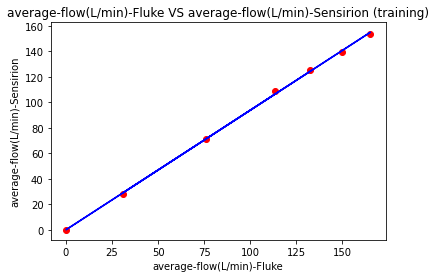

In [13]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lin_reg.predict(X_train), color='blue')
plt.title('average-flow(L/min)-Fluke VS average-flow(L/min)-Sensirion (training)')
plt.xlabel('average-flow(L/min)-Fluke')
plt.ylabel('average-flow(L/min)-Sensirion')
plt.show

In [14]:
# data test
test_reg = lin_reg.fit(X_test, y_test)

In [15]:
test_reg.coef_

array([0.93346462])

In [16]:
test_reg.intercept_

-0.7817444231263835

In [17]:
print("test Predictions:", lin_reg.predict(X_test[:5]))

test Predictions: [ 87.4616156  166.17547805  50.24585618 170.16234277]


In [18]:
print("test Labels:", list(y_test[:5]))

test Labels: [88.08349206, 166.2909821, 49.81313725, 169.8576812]


In [19]:
# Menghitung error
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4123517494228039

<function matplotlib.pyplot.show(close=None, block=None)>

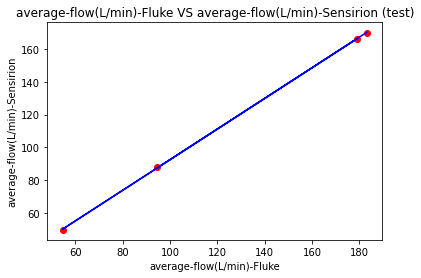

In [20]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lin_reg.predict(X_test), color='blue')
plt.title('average-flow(L/min)-Fluke VS average-flow(L/min)-Sensirion (test)')
plt.xlabel('average-flow(L/min)-Fluke')
plt.ylabel('average-flow(L/min)-Sensirion')
plt.show

In [21]:
#Percent VS average-flow(L/min)-Fluke
X = dataset.iloc[:,0].values
X = X.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [23]:
reg = lin_reg.fit(X_train, y_train)

In [24]:
reg.coef_

array([1.90958972])

In [25]:
reg.intercept_

7.720968122268033

In [26]:
print("Predictions:", lin_reg.predict(X_train[:5]))

Predictions: [122.29635135  26.81686533 141.39224855 160.48814576  65.00865974]


In [27]:
print("Labels:", list(y_train[:5]))

Labels: [125.36405409999999, 27.98185897, 139.4204348, 153.83219509999998, 71.49141593]


In [28]:
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.231884634997027

<function matplotlib.pyplot.show(close=None, block=None)>

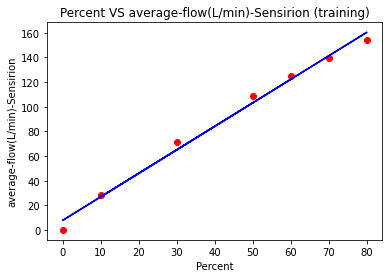

In [29]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lin_reg.predict(X_train), color='blue')
plt.title('Percent VS average-flow(L/min)-Sensirion (training)')
plt.xlabel('Percent')
plt.ylabel('average-flow(L/min)-Sensirion')
plt.show

In [30]:
# data test
lin_reg = LinearRegression()
test_reg = lin_reg.fit(X_test, y_test)

In [31]:
test_reg.coef_

array([1.52932473])

In [32]:
test_reg.intercept_

22.92852778553072

In [33]:
print("test Predictions:", lin_reg.predict(X_test[:5]))

test Predictions: [ 84.10151682 160.56775311  53.5150223  175.86100037]


In [34]:
print("test Labels:", list(y_test[:5]))

test Labels: [88.08349206, 166.2909821, 49.81313725, 169.8576812]


In [35]:
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.958711296038884

<function matplotlib.pyplot.show(close=None, block=None)>

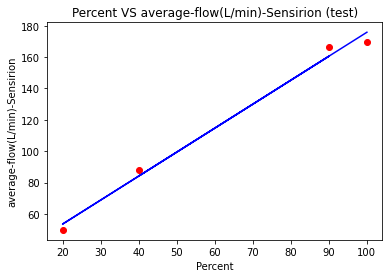

In [36]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lin_reg.predict(X_test), color='blue')
plt.title('Percent VS average-flow(L/min)-Sensirion (test)')
plt.xlabel('Percent')
plt.ylabel('average-flow(L/min)-Sensirion')
plt.show

In [37]:
#Polynomial Regression

In [38]:
#average-flow(L/min)-Fluke VS average-flow(L/min)-Sensirion
X = dataset.iloc[:,1].values
X = X.reshape(-1,1)

In [39]:
y = dataset.iloc[:,3].values

In [40]:
pol_feat = PolynomialFeatures(degree=1)
X_ = pol_feat.fit_transform(X)

In [41]:
pol_feat.fit(X_, y)

PolynomialFeatures(degree=1)

In [42]:
lin_reg.fit(X_, y)

LinearRegression()

In [43]:
print("Predictions:", lin_reg.predict(X_[:5]))

Predictions: [ 0.09942771 28.83906645 51.11064286 70.82722269 88.31079077]


In [44]:
print("Labels:", list(y[:5]))

Labels: [0.027115385, 27.98185897, 49.81313725, 71.49141593, 88.08349206]


In [45]:
y_pred = lin_reg.predict(X_)
lin_mse = mean_squared_error(y, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2212697888524218

<function matplotlib.pyplot.show(close=None, block=None)>

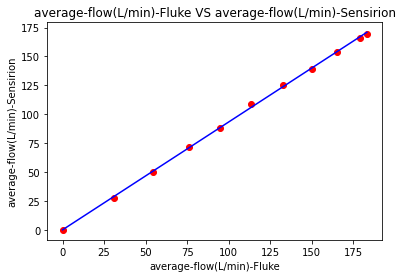

In [46]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X_), color='blue')
plt.title('average-flow(L/min)-Fluke VS average-flow(L/min)-Sensirion')
plt.xlabel('average-flow(L/min)-Fluke')
plt.ylabel('average-flow(L/min)-Sensirion')
plt.show

In [99]:
#Percent VS average-flow(L/min)-Fluke
X = dataset.iloc[:,0].values
X = X.reshape(-1,1)

In [100]:
pol_feat = PolynomialFeatures(degree=8)
X_ = pol_feat.fit_transform(X)

In [101]:
pol_feat.fit(X_, y)

PolynomialFeatures(degree=8)

In [102]:
lin_reg.fit(X_, y)

LinearRegression()

In [103]:
print("Predictions:", lin_reg.predict(X_[:5]))

Predictions: [ 0.586377   26.38952893 51.94078754 69.59938386 88.85945924]


In [104]:
print("Labels:", list(y[:5]))

Labels: [0.027115385, 27.98185897, 49.81313725, 71.49141593, 88.08349206]


In [105]:
y_pred = lin_reg.predict(X_)
lin_mse = mean_squared_error(y, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.0324929856099572

<function matplotlib.pyplot.show(close=None, block=None)>

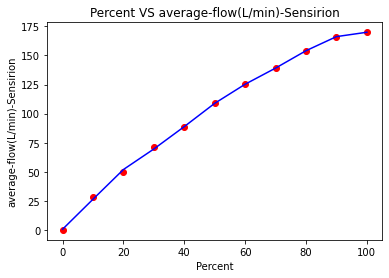

In [106]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X_), color='blue')
plt.title('Percent VS average-flow(L/min)-Sensirion')
plt.xlabel('Percent')
plt.ylabel('average-flow(L/min)-Sensirion')
plt.show

In [ ]:
# Untuk  perbandingan data average-flow(L/min)-Fluke VS average-flow(L/min)-Sensirion lebih baik menggunakan Linear Regression
# Sedangkan untuk perbandingan data Percent VS average-flow(L/min)-Sensirion lebih baik menggunakan Polynomial Regression